# Physical adsorption analysis

Use this template as a starting point to carry out the analysis tasks.  For reference, here are links to recommended Python resources: the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.

## Standard Packages

This is a good idea at the beginning of your notebook to include the packages that you will need.  We will use those shown below here.  A brief description:
* `numpy` is the foundational package for Python numerical work. It extends and speeds up array operations beyond standard Python, and it includes almost all math functions that you would need for example `sqrt()` (square root) or `cos()` (cosine).  These would be written in code as `np.sqrt()` or `np.cos()`.
* `scipy` is a huge collection of scientific data analysis functions, routines, physicical constants, etc.  This is the second most used package for scientific work. Here we will use the physical constants library, `scipy.constants`.  Documentation is at [SciPy.org](https://docs.scipy.org/doc/scipy/reference/) with the constants subpackage at https://docs.scipy.org/doc/scipy/reference/constants.html.
* `uncertainties` is a very useful small package that simplifies uncertainty propagation and printing out of quantities with uncertainty. Documentation is at https://pythonhosted.org/uncertainties/
* `matplotlib` is *the* standard plotting package for scientific Python.  We will use a subset called `pyplot` which is modeled after the plotting functions used in MATLAB. The last line below, `%matplotlib inline`, simply forces the plots to appear within the notebook.
* `pandas` is a large data science package.  It's main feature is a set of methods to create and manipulate a "DataFrame," which is an enlargement of the idea of an array.  I plays well with NumPy and other packages.  We will use it mainly as a way to read files into data sets in an easy way.
* [LMFit](https://lmfit.github.io/lmfit-py/) is excellent for carrying out line and curve fits with many useful features.

## Getting Help

See the example code for a wide range of actions in notebooks created by Prof. Marjorie Olmstead and Prof. David Pengra in this repository: [**Physics431/Examples**](https://github.com/Physics431/Examples).

You can pull the examples into your environment with the following command.  (Only do this once, or you will get an error):

    git clone https://github.com/Physics431/Examples

## Task Summary

1. Create a Python code block that will calculate an expected dosing pressure for a next dose, given the current equilibrium pressure, current adsorbed amount, and expected additional adsorbed amount.  Use this code to estimate the dosing pressure for the first 4 data points and check with the instructor or TA to make sure you are ready to start taking data.
2. With your software code, set up the ability to make a plot similar to Figure 5 that will allow you to watch the progress of the isotherm as it is created.
3. Collect and plot data for the argon isotherm, per the instructions.  Include a table of your pressure measurements before and after each dose along with the calculated adsorbed amount.
4. Repeat the procedure to collect and plot data for nitrogen isotherm.  Be careful: the substep will appear between 7 and 9 torr; decrease dose sizes significantly so that you do not miss this feature.
5. Determine the monolayer completion volume-STP of the nitrogen floating phase and the argon by using the “point B” method.  You may fit a line to a subset of points in your data, and show this line on the full data set.  Also show the location of “point B” for each set.


In [50]:
# Usually import packages via a handle to the functions in them using import ... as ...
#
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import uncertainties as unc
%matplotlib inline

In [51]:
# Useful plot default
mpl.rcParams['figure.figsize'] = 12.0,8.0  # Roughly 12 cm wde by 8 cm high
mpl.rcParams['font.size'] = 14.0 # Use 14 point font

## Calculate expected dosing

Rearrange the formulas giving the coverage amount for each step summarized by the [Number versus Pressure](http://courses.washington.edu/phys431/adsorption/Volume-vs-Pressure_deriv.pdf) calculation to make a formula that predicts the dosing pressure given the sample and calibration volumes $v_s$ and $v_c$, the room temperature $T$ (K), the standard temperature and pressure $T_0 = 273$ K and $P_0 = 760$ torr, and the amount adsorbed in a given step in $V_{STP}$ (in cc).

Then make a Python function that calculates this given the input quantities.

In [58]:
### GLOBAL
P_std = 760
T_std = 273
T_rm = 295
v_s = 34.8
v_c = 85.1

# Create your function here
def dose_pressure(V_ads, P_eq):
    P_c=np.zeros(len(V_ads)-1)
    
    for i in range(len(P_c)):
        delta_v_ads=V_ads[i+1]-V_ads[i]
        P_s_0=P_eq[i]
        P_s_f=P_eq[i+1]
        P_c[i]=delta_v_ads*(1/v_c)*(P_std*T_rm/T_std)  +  (v_s/v_c)*(P_s_f-P_s_0)  +  P_s_f
        
    return P_c

Read the graph showing example data (Figure 5) and extract the adsorbed amount $V_{\rm ads}$ versus pressure $P$ for the first 4 or 5 data points.  Feed this data to your function and make a table showing the dosing pressure expected to create those data.

In [92]:
# Create arrays to hold the extracted results
V_ads = np.array([0, 2.5, 3.7, 5.1, 6.8, 8.5, 9.8, 10.7, 11.2, 11.3, 11.5, 11.7, 11.9, 11.95])
P_eq = np.array([0, 0.3, 0.5, 0.55, 0.6, 0.7, 0.95, 1.9, 4.25, 5.6, 7.8, 9.4, 10.9, 12.6])

P_c = dose_pressure(V_ads, P_eq)

# Feed the arrays to your function above, and print a table
df = pd.DataFrame({'V Adsorbed': V_ads[1:], 'Equilibrium Pressure': P_eq[1:], 'Dose Pressure': P_c})
df

,V Adsorbed,Equilibrium Pressure,Dose Pressure
0,2.50,0.30,24.548573
1,3.70,0.50,12.162215
2,5.10,0.55,14.080947
3,6.80,0.60,17.026054
4,8.50,0.70,17.146501
5,9.80,0.95,13.597697
6,10.70,1.90,10.973806
7,11.20,4.25,10.036166
8,11.30,5.60,7.117092
9,11.50,7.80,10.629719


Check with the instructor or TA to make sure your calculation is correct before starting to dosing procedure.

## Set up data plotting

Create another function that will use your initial and final pressure for each point, along with the system parameters (volumes, room temperature) to plot a graph of your data similar to Figure 5 as you collect the data. 

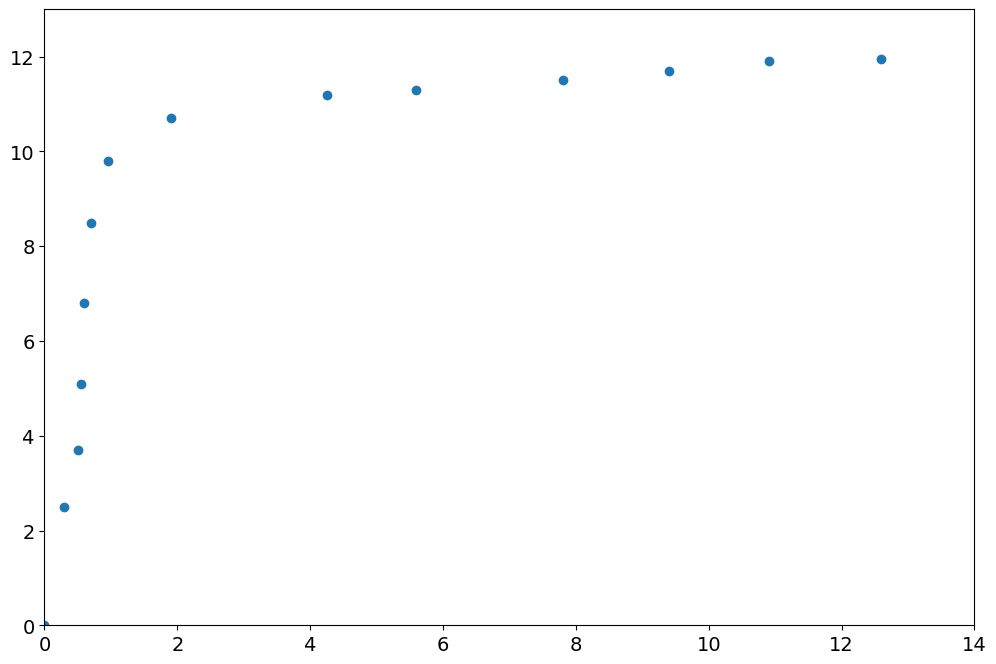

In [93]:
# Create your function here
def calc_v_ads(P_eq, P_c):
    V_ads = np.zeros(len(P_eq))
    
    for i in range(len(P_c)):
        delta_P_s = P_eq[i+1]-P_eq[i]
        delta_P_c = P_eq[i+1]-P_c[i]
        delta_v_ads = -(T_std/(P_std*T_rm)) * (v_s*delta_P_s + v_c*delta_P_c)
        V_ads[i+1] = V_ads[i] + delta_v_ads

    return V_ads

V_ads = calc_v_ads(P_eq, P_c)

plt.scatter(P_eq, V_ads)
plt.xlim(0, 14)
plt.ylim(0, 13)
plt.show()

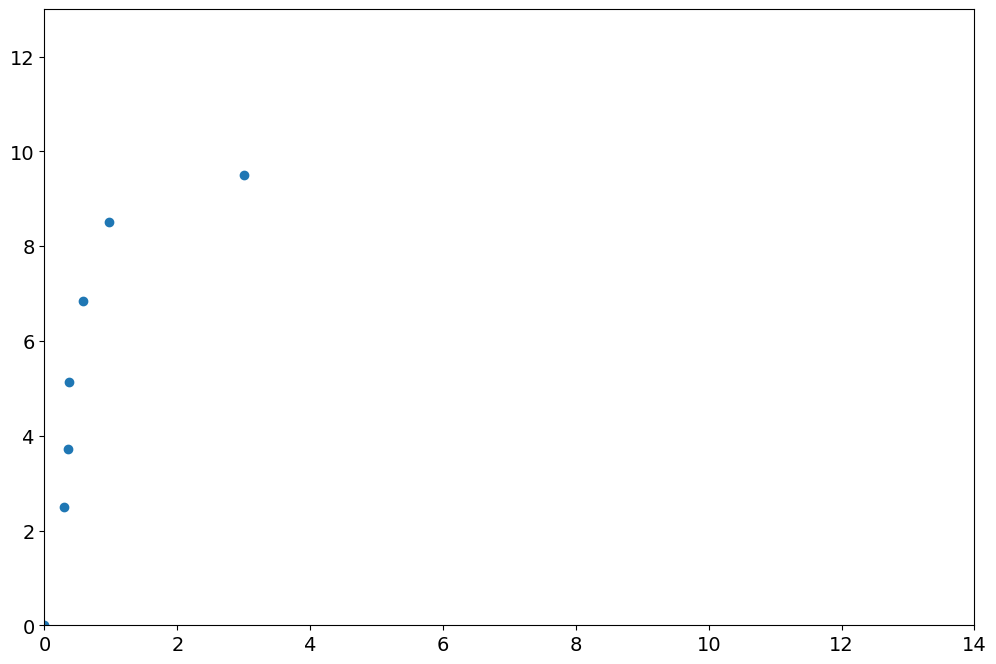

In [109]:
# Ar data
P_c = np.array([24.446, 12.20, 14.07, 17.16, 17.14, 13.44])
P_eq = np.array([0, 0.3, 0.36, 0.37, 0.58, 0.97, 3.0])

V_ads = calc_v_ads(P_eq, P_c)

plt.scatter(P_eq, V_ads)
plt.xlim(0, 14)
plt.ylim(0, 13)
plt.show()

Recommended: open a spreadsheet to save the data to a separate file.  Then read in the spreadsheet with Pandas `pd.read_csv()`:
    
    Ar_data = pd.read_csv('Ar_adsorption_data.csv')


In [ ]:
# Read in the data and print the datafame


Build another dataframe from your function and the final pressure at each dose.

In [ ]:
# Make a results dataframe from the calculation and pressure values


#### Make a plot

Plot the adsorbed amount $V_{\rm ads}$ versus pressure $P$

In [ ]:
# See the examples for making a plot.


Repeat the above cells to build your plot as you go:
1. Calculate the dose
2. Carry out the dosing for that step:
    * Record the initial pressure in the spreadsheet
    * Measure and record the final pressure in the spreadsheet
4. Read in the sheet and calculate the adsorbed amount
5. Plot the whole data set


## Save your data

After you have completed the data run, save your dataframe with the adsorbed amount versus final pressure to another spreadsheet file.  Use the method `to_csv()`.  If the dataframe is called `Ar_results`, then 

    Ar_results.to_csv('Argon_isotherm.csv', index=False)
    
will make a simple spreadsheet file.  (`index=False` suppresses an index column which is not needed here.)

In [ ]:
# save your results


## Repeat for nitrogen

Repeat he above steps for the nitrogen isotherm.  You do not need to redo the expected dosing calculation, unless you want.

In [ ]:
# read in the data and print the datafame


In [ ]:
# Make a results dataframe from the calculation and pressure values


In [ ]:
# Make a plot


In [ ]:
# Save the final results


## Use 'Point B' method to find monolayer coverage

The 'point B' method is a standardized way to estimate the monolayer coverage.  One fits the data points along the top of the step that are mostly linear in pressure.  The point at which this line intersects the knee of the curve is considered point "B". (Point "A" would be where the line intersects the y axis).

Use LMfit.  An example is sketched below.

Then fit the line to a slice of the data that is the linear portion.  Plot the line on the isotherm, and estimate the line's intersection with the knee by eye.  

Use the line parameters to calculate the coverage at the knee.

In [ ]:
# Set  up the Model

# Import the Linear model.
# You only do this once in a notebook
from lmfit.models import LinearModel

# create an instance of the model
# You only need to do this once
line = LinearModel()


In [ ]:
# Argon first
#

# Select a "slice" of the data set from the results
#
# Here is an example
indices = list(range(3,9))
x_data = Ar_results['Pressure (torr)'][indices]
y_data = Ar_results['Coverage (cc-STP)'][indices]

# Get starting parameters
Ar_params = line.guess(y_data, x=x_data)

# Feed these into the fitter and run it.
Ar_fit = line.fit(y_data, Ar_params, x=x_data)

# Print the results
Ar_fit

In [ ]:
# Make a plot with the line included
# To include the line evaluated across the whole data set, use the eval() method, like this:
# 
plt.plot(Ar_results['Pressure (torr)'],Ar_fit.eval(x=Ar_results['Pressure (torr)']),'-',label='Point B line')
# Add in he rest of the plot commands here, including the data.
#


### Evaluate the coverage at point 'B'

By eye from the plot, locate where the knee of the data, approximately, intersects the line (or begins to deviat away from it significantly).

Use the `eval()` method to obtain the coverage.

Then estimate an uncertainty for point B, and use eval to estimate an uncertainty in the coverage.  Assemble the result into an uncertainty object.


In [ ]:
# You code this


### Repeat for the nitrogen isotherm

You know what to do now.  Avoid the substep in your slice selection.


In [ ]:
# Argon first
#

# Select a "slice" of the data set from the results
#

# Get starting parameters

# Feed these into the fitter and run it.

# Print the results


In [ ]:
# Make a plot with the line included
# To include the line evaluated across the whole data set, use the eval() method, like this:
# 

In [ ]:
# Evaluate the coverage at point B and its uncertainty


## Recommended: Complete the other calculations in this notebook

These are
* Extract the coverage at the top of the nitrogen isotherm substep and calculate the surface area of the graphite.
* Use the area to calculate the unit cell size of the argon monolayer.
* Look up the bulk unit cell of solid argon (fcc structure) and determine the atomic spacing.
* Evaluate the energy minimum of the Lennard-Jones potential, and estimate the equlibrium spacing from the constants given.
* Make a small table to compare the three different spacing of Ar atoms in different cases: in 3D bulk, in the adsorbed monolayer, and in a simple pair from the L-J potential.

In [ ]:
# Add code cells as needed.